# COVID data quality checker

In [1]:
!pwd
!curl -O https://data.covid19japan.com/summary/latest.json

/Users/hide/_jupyter_notebooks/COVID-19/COVID-modeling
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  256k  100  256k    0     0   139k      0  0:00:01  0:00:01 --:--:--  139k


In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
# from bokeh.io import output_notebook, show
import seaborn as sns
sns.set()

# output_notebook()
%matplotlib inline

/Users/hide/_jupyter_notebooks/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [10]:
!poetry add ipywidgets>=7.5

^C


In [31]:
def load_data(filepath):
    with open(filepath, 'r') as f:
        data = json.loads(f.read())
    df = pd.DataFrame(data['daily'])
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    columns = [col for col in df.columns if 'Avg' not in col]
    df = df[:-1][columns]  # cut off the last row
    return df
    
df = load_data('latest.json')
df.tail(3).transpose().head()

date,2020-05-14,2020-05-15,2020-05-16
confirmed,80.0,52.0,54.0
confirmedCumulative,16056.0,16108.0,16162.0
deceased,16.0,13.0,13.0
deceasedCumulative,717.0,730.0,743.0
recovered,523.0,605.0,296.0


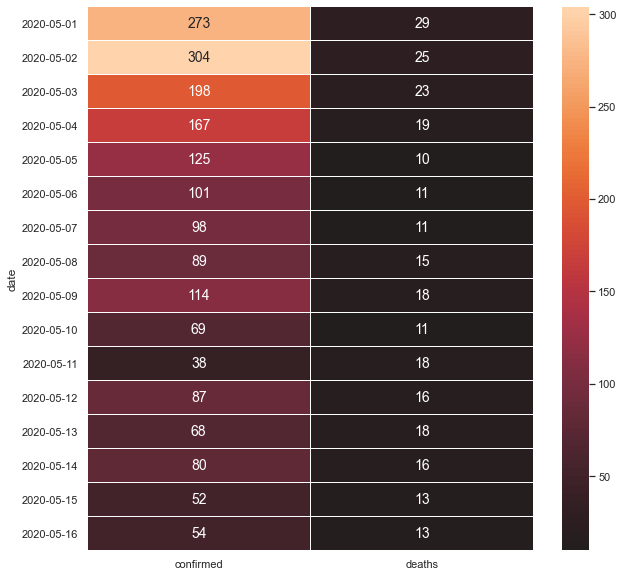

In [32]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

hm_df = df.copy()
hm_df.index = df.index.strftime('%Y-%m-%d')

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(hm_df.loc['2020-05-01':][['confirmed', 'deaths']],
            fmt='.0f',
            annot=True,
            linewidths=.5,
            center=0,
            annot_kws={'fontsize':14},
            ax=ax)